# Data exploration of the Fish large dataset

## Setup

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
DATASET_PATH = 'C:/Users/rapha/Documents/Dataset/Fish_Dataset/Fish_Dataset'

folders = os.listdir(DATASET_PATH)
labels = []
for f in folders:
    if not('.m' in f) and not('.txt' in f):
        labels.append(f)

***note :***

For now we have a hard coded path for the Dataset, we need to have a proper way to access the data (push it ?, Cloud storage ?, Local ?)

In [4]:
print('Labels : \n', labels)

Labels : 
 ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


## Exploring the data

### 1. Visualize a random image of each class**

Black Sea Sprat :


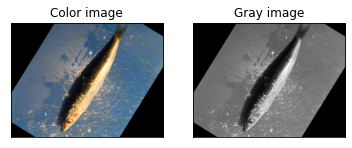

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Gilt-Head Bream :


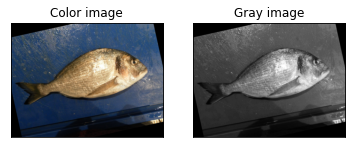

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Hourse Mackerel :


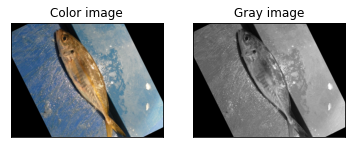

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Red Mullet :


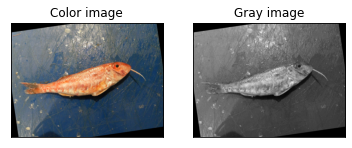

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Red Sea Bream :


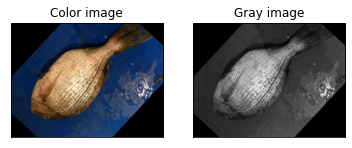

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Sea Bass :


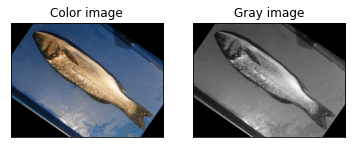

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Shrimp :


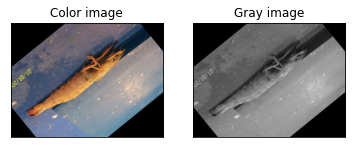

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Striped Red Mullet :


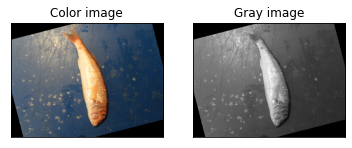

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------
Trout :


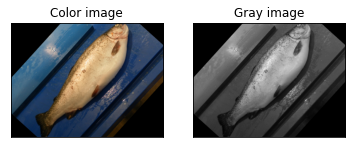

Dimension of color image: (445, 590, 3)
Dimension of gray image: (445, 590)
---------------------------------------------


In [5]:
dataset_repartition = {} #number of samples in each class
img_test = [] #path to test images for each class

for i in range(len(labels)):
    folder = os.path.join(DATASET_PATH, labels[i], labels[i])
    images = os.listdir(folder)
    #Add the number of images for this class in the dataset_repartiton dictionary
    dataset_repartition[labels[i]] = len(images)
    #Get one random image, stor its path and visualize it
    img_path = os.path.join(folder, images[np.random.randint(0, len(images))])
    img_test.append(img_path)
    #Load the image in a numpy array
    img = cv2.imread(img_path)
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    print(labels[i], ':')
    plt.figure()
    plt.title(labels[i])
    plt.subplot(1, 2, 1)
    plt.title('Color image')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.title('Gray image')
    plt.imshow(img_gray, cmap='gray')
    plt.xticks([])
    plt.yticks([])

    plt.show()
    print('Dimension of color image: {0}'.format(img.shape))
    print('Dimension of gray image: {0}'.format(img_gray.shape))
    print('---------------------------------------------')

The images seem to have the same number of pixel (445x590) and three channels for the RGB images. This dimension is quite large and may need to be resized.

### 2. Number of samples per class**

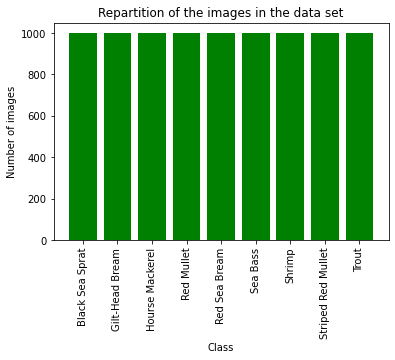

In [6]:
plt.figure()
plt.title('Repartition of the images in the data set')
plt.bar(dataset_repartition.keys(), dataset_repartition.values(), color='g')
plt.ylabel('Number of images')
plt.xlabel('Class')
plt.xticks(np.arange(0, len(labels)), labels, rotation=90)
plt.show()

We can see that the dataset is balanced with equal number of images in each class.

### 3. Normalization of the images by dividing the pixel with 255**

Black Sea Sprat :


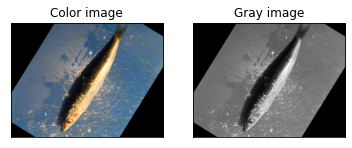

Gilt-Head Bream :


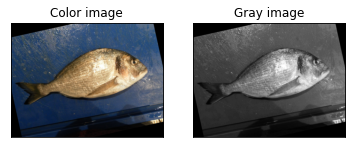

Hourse Mackerel :


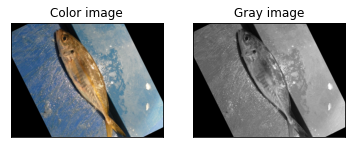

Red Mullet :


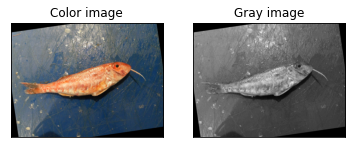

Red Sea Bream :


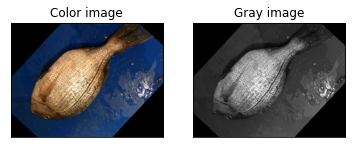

Sea Bass :


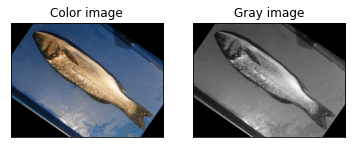

Shrimp :


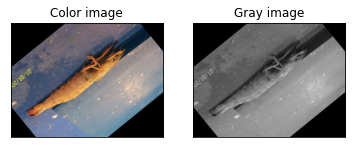

Striped Red Mullet :


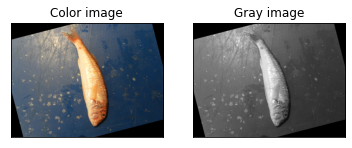

Trout :


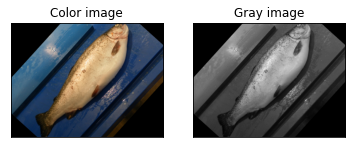

In [7]:
for i in range(len(labels)):
    img = cv2.imread(img_test[i])
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    img_norm = img/255
    img_g_norm = img_gray/255
    print(labels[i], ':')
    plt.figure()
    plt.title(labels[i])
    plt.subplot(1, 2, 1)
    plt.title('Color image')
    plt.imshow(img_norm)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.title('Gray image')
    plt.imshow(img_g_norm, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### 4. Resizing of the images

Black Sea Sprat :


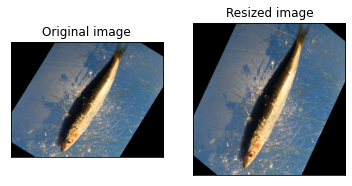

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Gilt-Head Bream :


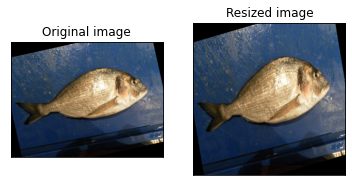

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Hourse Mackerel :


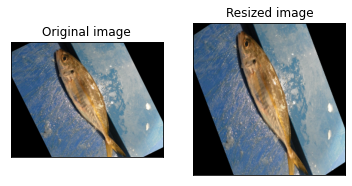

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Red Mullet :


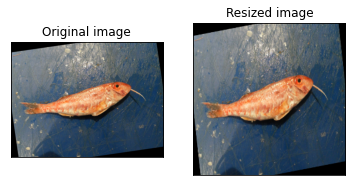

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Red Sea Bream :


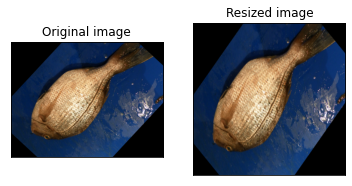

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Sea Bass :


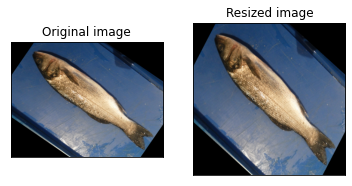

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Shrimp :


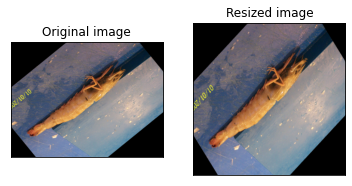

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Striped Red Mullet :


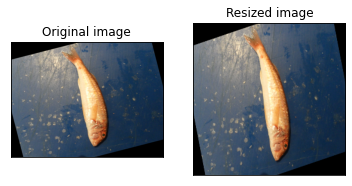

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------
Trout :


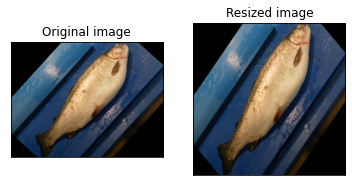

Dimension of the original image: (445, 590, 3)
Dimension of the resized image: (256, 256, 3)
---------------------------------------------


In [8]:
target_shape = (256, 256)

for i in range(len(labels)):
    img = cv2.imread(img_test[i])
    img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(src=img, dsize=target_shape)
    print(labels[i], ':')
    plt.figure()
    plt.title(labels[i])
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.title('Resized image')
    plt.imshow(img_resize)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print('Dimension of the original image: {0}'.format(img.shape))
    print('Dimension of the resized image: {0}'.format(img_resize.shape))
    print('---------------------------------------------')

It seems that the images can be resized to the shape of (256, 256) for example which could reduce the complexity of the ML model.